<a href="https://colab.research.google.com/github/jonglees/transmembrane-practical/blob/main/practical_transmem_ML_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 0: Set things up
Download the training set for a transmembrane predictor
(just run the cells in this section, no changes needed)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import h5py


In [2]:
"""Download training data"""
!wget https://github.com/jonglees/transmembrane-practical/raw/refs/heads/main/df_tm_surf_train.h5

--2025-03-19 03:13:28--  https://github.com/jonglees/transmembrane-practical/raw/refs/heads/main/df_tm_surf_train.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonglees/transmembrane-practical/refs/heads/main/df_tm_surf_train.h5 [following]
--2025-03-19 03:13:28--  https://raw.githubusercontent.com/jonglees/transmembrane-practical/refs/heads/main/df_tm_surf_train.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21259800 (20M) [application/octet-stream]
Saving to: ‘df_tm_surf_train.h5’

df_tm_surf_train.h5 100%[===================>]  20.27M  64.0MB/s    in 0.3s    

2025-03-19 03:13:30 (64

In [3]:
"""Make training data balanced between transmembrane and non-transmembrane"""
df_train=pd.read_hdf("df_tm_surf_train.h5")
num_pos_tm=df_train[df_train.tm==1].shape[0]
num_neg_tm=df_train[df_train.tm==0].shape[0]
print("number transmembrane", num_pos_tm, "number non transmembrane", num_neg_tm, "before balancing classes")
df_train_pos_tm = df_train[df_train.tm==1]
df_train_neg_tm = df_train[df_train.tm==0].sample(num_pos_tm)
df_train_tm = pd.concat([df_train_pos_tm, df_train_neg_tm])
num_pos_tm=df_train_tm[df_train_tm.tm==1].shape[0]
num_neg_tm=df_train_tm[df_train_tm.tm==0].shape[0]
print("number transmembrane", num_pos_tm, "number non transmembrane", num_neg_tm, "after balancing classes")

number transmembrane 2632 number non transmembrane 6917 before balancing classes
number transmembrane 2632 number non transmembrane 2632 after balancing classes


# Task 1: Train and evaluate your own ML method to predict transmembrane proteins. Optimise your random forest, What accuracy level can you get ?

In [ ]:
#train and evaluate random forest classifier using scikits with the df_train_tm data frame using the embeddings column as inputs and the binary label 'tm' as the ouput


In [9]:
# @title Example Answer


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    list(df_train_tm['embeddings']), df_train_tm['tm'], test_size=0.2, random_state=42
)

# Initialize and train a RandomForestClassifier
clf_tm = RandomForestClassifier(random_state=42,n_estimators=50,max_depth=4)  # You can adjust hyperparameters here
clf_tm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_tm.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       510
           1       0.93      0.83      0.88       543

    accuracy                           0.88      1053
   macro avg       0.88      0.88      0.88      1053
weighted avg       0.88      0.88      0.88      1053



# Task 2: Plot a ROC curve of your data

In [ ]:
#write code to plot a ROC curve using scikits on the test set using the trained classifier


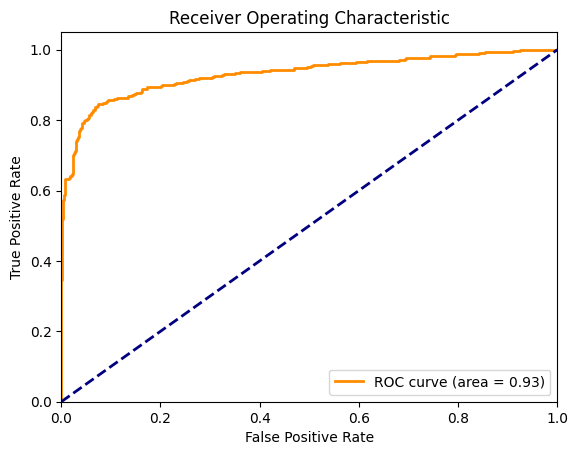

In [10]:
# @title Example Answer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_prob = clf_tm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Task 3: Train and evaluate your own ML method to predict cell surface proteins. Optimise your random forest, What accuracy level can you get ?

In [5]:
"""First just run this cell if you want a balanced set of positive and negative examples"""
num_pos_surf=df_train[df_train.surf==1].shape[0]
num_neg_surf=df_train[df_train.surf==0].shape[0]
df_train_pos_surf = df_train[df_train.surf==1].sample(num_neg_surf)
df_train_neg_surf = df_train[df_train.surf==0]
df_train_surf = pd.concat([df_train_pos_surf, df_train_neg_surf])

In [ ]:
#train and evaluate random forest classifier using scikits with the df_train_surf data frame using the embeddings column as inputs and the binary label 'surf' as the ouput


In [ ]:
# @title Example Answer
#plot a ROC curve using scikits on the test set using the trained classifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    list(df_train_surf['embeddings']), df_train_surf['surf'], test_size=0.2, random_state=42
)

# Initialize and train a RandomForestClassifier
clf_surf = RandomForestClassifier(random_state=42,n_estimators=100,max_depth=5)  # You can adjust hyperparameters here
clf_surf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_surf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Predict probabilities for the positive class
y_prob = clf_surf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Task 4: How many cell surface proteins does your ML tool predict? What prediction does it make for A8MTB9 ?


In [ ]:
# @title Example Answer
df_train['surf_pred']=clf_surf.predict(list(df_train['embeddings']))
df_train['tm_pred']=clf_tm.predict(list(df_train['embeddings']))

df_train['surf_pred_prob']=clf_surf.predict_proba(list(df_train['embeddings']))[:, 1]
df_train['tm_pred_prob']=clf_tm.predict_proba(list(df_train['embeddings']))[:, 1]



print ("total TM surface predictions", df_train[df_train.surf_pred ==1].shape[0])

print("predictions for protein A8MTB9", df_train[df_train.accessions=="A8MTB9"][['surf_pred','surf_pred_prob']])

# Task 5: Optional Extra

Using Deep learning, Design a protein binder to PDL1
https://colab.research.google.com/github/martinpacesa/BindCraft/blob/main/notebooks/BindCraft.ipynb
